In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd


In [4]:
df=pd.read_csv('iris.csv')

In [5]:
m=df.isna().sum()

In [8]:
m

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
m[m>0]

Series([], dtype: int64)

In [7]:
df.duplicated().sum()

1

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# seperate x and y values

In [10]:
x=df.drop(columns=['species'])

In [11]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y=df[['species']]

In [13]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


<Axes: xlabel='species'>

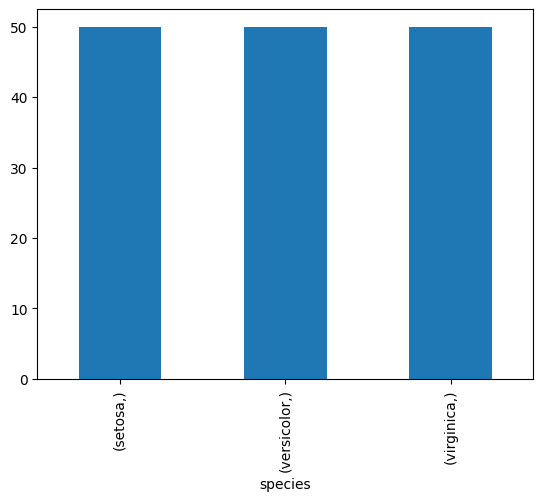

In [23]:
y.value_counts().plot(kind='bar')

### apply preprocessing

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [24]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                             ('scaler',StandardScaler())]).set_output(transform='pandas')

In [25]:
x_pre=num_pipe.fit_transform(x)

In [27]:
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [34]:
from sklearn.model_selection import train_test_split
xtrain,xest,ytrain, ytest=train_test_split(x_pre,y,test_size=0.33,random_state=21)

In [35]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [36]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor
